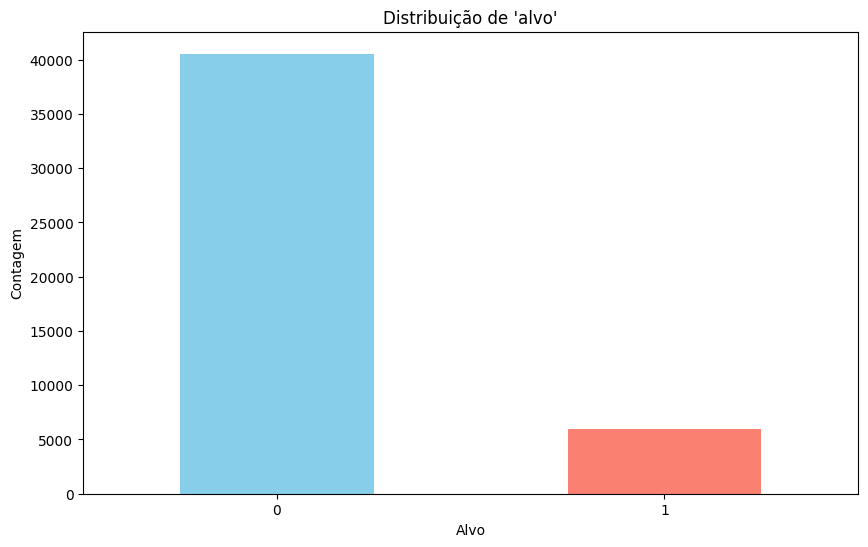

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel("Dados Tratados.xlsx")

plt.figure(figsize=(10, 6))
    
# Plotando o gráfico de barras
cross_tab = data['alvo'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])

plt.title("Distribuição de 'alvo'")
plt.xlabel("Alvo")
plt.ylabel("Contagem")
plt.xticks([0, 1], ['0', '1'], rotation=0)
    
plt.show()


alvo
0    40542
1    40542
Name: count, dtype: int64


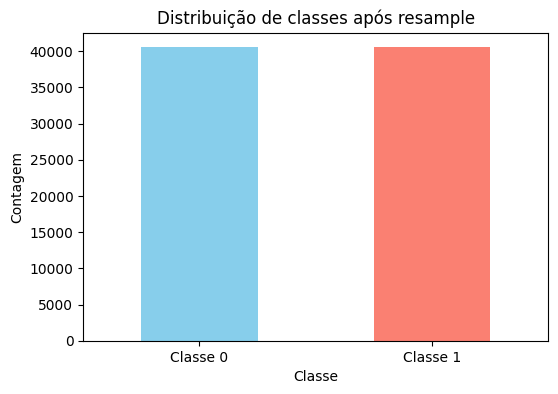

In [7]:
from sklearn.utils import resample

# Separar as classes minoritária e majoritária
classe_maior = data[data['alvo'] == 0]
classe_menor = data[data['alvo'] == 1]

# Fazer resample da classe minoritária com reposição para ter o mesmo número de amostras da classe majoritária
classe_menor_resampled = resample(classe_menor, 
                                  replace=True,     # Amostras são substituídas após cada resample
                                  n_samples=len(classe_maior),    # Número de amostras igual à classe majoritária
                                  random_state=42)  # Reprodutibilidade dos resultados

# Concatenar a classe majoritária com a classe minoritária resampleada
data_resampled = pd.concat([classe_maior, classe_menor_resampled])

# Verificar os novos tamanhos das classes
print(data_resampled['alvo'].value_counts())

# Plotar o gráfico de barras da distribuição do target após o resample
plt.figure(figsize=(6, 4))
data_resampled['alvo'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribuição de classes após resample')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Classe 0', 'Classe 1'], rotation=0)
plt.show()